In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

paths = os.getcwd().split(os.sep)
paths[-2]='image'
paths[-1]='tulip.jpeg'
image_path = os.sep.join(paths)
# print(image_path)
if(os.path.exists(image_path)):
  print(image_path)
else:
  print("File not found")

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
N, M = img.shape
s = 64  # grid size

/home/silicon/opencv_learn/image/tulip.jpeg


In [ ]:
def histogram_equalization_demo(image):
    """Histogram Equalization"""
    return cv2.equalizeHist(image)

def clahe_demo(image, clipLimit=2.0, tileGridSize=(8,8)):
    """Contrast Limited Adaptive Histogram Equalization (CLAHE)"""
    clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
    return clahe.apply(image)

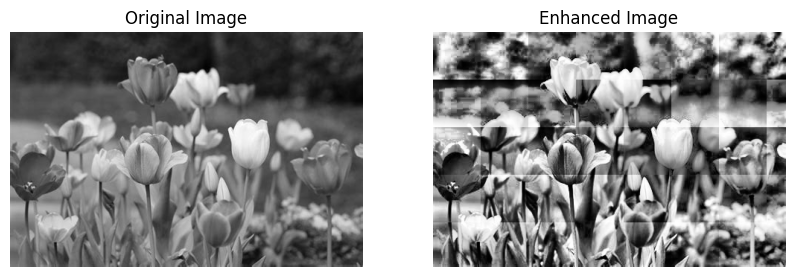

In [ ]:

output = np.zeros_like(img)

for i in range(0, N, s):
    for j in range(0, M, s):
        block = img[i:i+s, j:j+s]
        
        if (i+j) % 4 == 0:
            enhanced = histogram_equalization_demo(block)  # HE
        elif (i+j) % 4 == 1:
            enhanced = clahe_demo(block, clipLimit=2.0, tileGridSize=(8,8))  # CLAHE
        elif (i+j) % 4 == 2:
            enhanced = clahe_demo(block, clipLimit=5.0, tileGridSize=(8,8))  # CLAHE (higher clip)
             
        else: 
            block_float = block.astype(np.float32)  
            imax = np.max(block_float)
            imin = np.min(block_float)
            enhanced = ((block_float - imin) / (imax - imin) * 255).astype(np.uint8)  # Normalization
            
        output[i:i+s, j:j+s] = enhanced


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Enhanced Image')
plt.imshow(output, cmap='gray')
plt.axis('off')
plt.show()
